# Motor Model

$$
v_{in} = R i(t) + L \dot{i}(t) + k w\\
$$

$$
J_m \dot{w} = k i(t) - B w - C
$$

C: dry friction torque

B: firiction constant with speed

J_m: shaft inertial

R: winding resistance

L: winding inductance

k: torque and back emf constant (identical)

# Identification

## 1: R

R = 4.75 $\Omega$ (by measurement)

## 2: K

- At steady state ($t \rightarrow \infty$), $\dot{i}(t) = 0$, so:
$$
k = {{v_{in} - Ri(t)}\over {w}}
$$

- Test 1:

vin = 5.81 v,  i = 103.5 mA, w = 28.03 rad/s

$\rightarrow$ k = 0.18974

used value: k=0.185 (another test gave 0.184)

# Sinosidal input


<IPython.core.display.Javascript object>


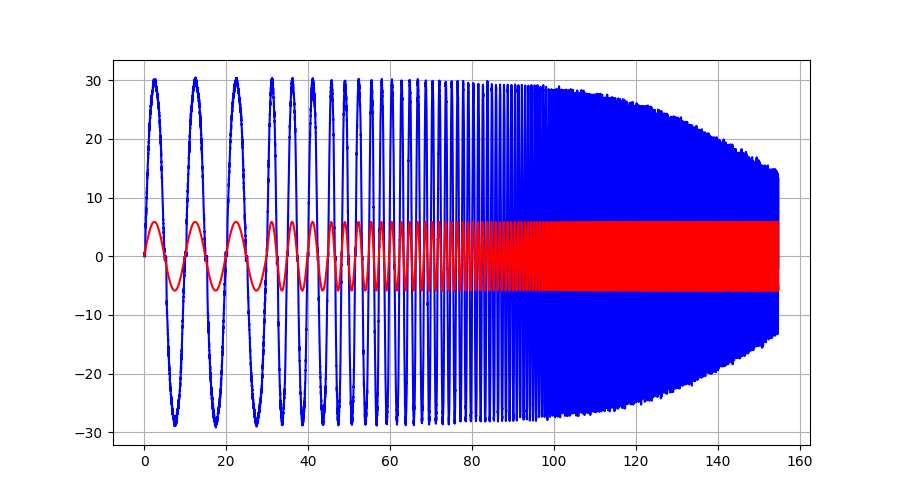

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)

data = np.loadtxt("sinosoidal.csv", delimiter=',')
spd_all = data[:,0]
pwr_all = data[:,1]*5.86*0.01
freq = data[:,2]
t = np.array([i*0.01 for i,_ in enumerate(spd_all)])
start = 0
end = -1
ax1.plot(t[start:end],spd_all[start:end],'b')
ax1.plot(t[start:end],pwr_all[start:end],'r')
ax1.grid()
#ax1.set_ylim([-110,110])

In [3]:
spd = []
spd_f = []
pwr = []
pwr_f = []
t = []
fq = []
for f in np.unique(freq):
    idxs = np.argwhere(freq == f)
    spd.append(spd_all[idxs].flatten())
    spd_f.append(np.fft.fft(spd[-1]))
    pwr.append(pwr_all[idxs].flatten())
    pwr_f.append(np.fft.fft(pwr[-1]))
    t.append(np.array([i*0.01 for i,_ in enumerate(spd[-1])]))
    fq.append(np.fft.fftfreq(t[-1].shape[0], d=0.01))

<IPython.core.display.Javascript object>


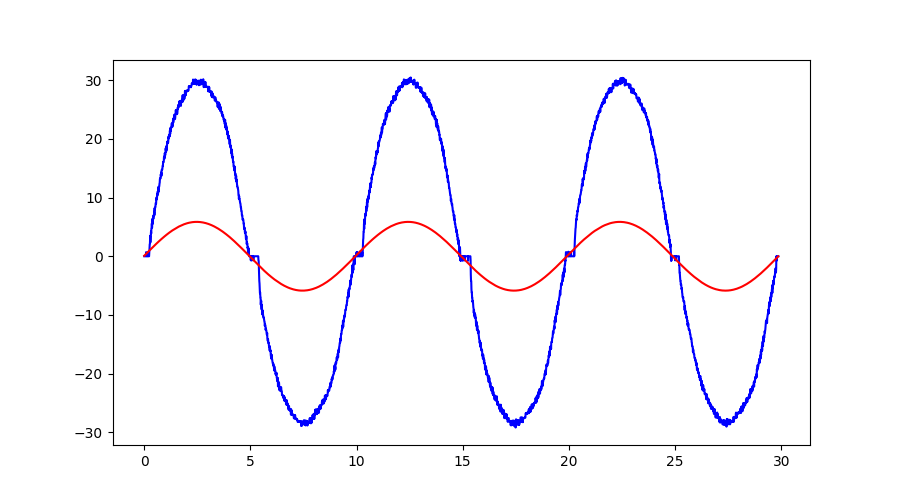

In [4]:
fig2 = plt.figure(figsize=(9,5))
ax2 = fig2.add_subplot(111)


ax2.plot(t[0], spd[0], 'b')
ax2.plot(t[0], pwr[0], 'r')